# House Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParamsDefault['figure.figsize'] = [15,10]
pd.set_option('display.max_rows',None)

In [2]:
data = pd.read_csv('simple house prediction.csv')
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [3]:
data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

From above two things are clear:



1 - We have one column which is categorical type

2 - We have some data missing in total_bedrooms columns

In [4]:
print(data['ocean_proximity'].value_counts())
print(' \n \n')
print("Total no of columns in null values in dataset\n",data.isnull().sum())

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64
 
 

Total no of columns in null values in dataset
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [5]:
null_data = data[data['total_bedrooms'].isnull()]
null_data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290      -122.16     37.77                47.0       1256.0             NaN   
341      -122.17     37.75                38.0        992.0             NaN   
538      -122.28     37.78                29.0       5154.0             NaN   
563      -122.24     37.75                45.0        891.0             NaN   
696      -122.10     37.69                41.0        746.0             NaN   
738      -122.14     37.67                37.0       3342.0             NaN   
1097     -121.77     39.66                20.0       3759.0             NaN   
1350     -121.95     38.03                 5.0       5526.0             NaN   
1456     -121.98     37.96                22.0       2987.0             NaN   
1493     -122.01     37.94                23.0       3741.0             NaN   
1606     -122.08     37.88                26.0       2947.0             NaN   
2028     -119.75     36.71                38.0       1481.0             NaN   
2115     -119.72     36.76                23.0       6403.0             NaN   
2301     -119.78     36.82                25.0       5016.0             NaN   
2323     -119.73     36.83                 8.0       3602.0             NaN   
2334     -119.69     36.83                32.0       1098.0             NaN   
2351     -119.68     36.79                16.0       1551.0             NaN   
2412     -119.45     36.61                24.0       1302.0             NaN   
2420     -119.44     36.58                37.0       1054.0             NaN   
2578     -124.06     40.86                34.0       4183.0             NaN   
2608     -124.00     40.92                29.0       1429.0             NaN   
2647     -124.13     40.55                38.0        544.0             NaN   
2826     -119.11     35.42                52.0        154.0             NaN   
3024     -119.46     35.14                30.0       2943.0             NaN   
3328     -122.72     38.88                29.0       2781.0             NaN   
3354     -120.67     40.50                15.0       5343.0             NaN   
3376     -118.28     34.25                29.0       2559.0             NaN   
3482     -118.45     34.30                27.0       2676.0             NaN   
3485     -118.55     34.28                16.0       8879.0             NaN   
3529     -118.53     34.26                18.0       3674.0             NaN   
3721     -118.43     34.20                28.0       3386.0             NaN   
3778     -118.40     34.17                24.0       6347.0             NaN   
3912     -118.55     34.19                18.0       5862.0             NaN   
3921     -118.56     34.20                35.0       2273.0             NaN   
3958     -118.59     34.20                21.0       1789.0             NaN   
4043     -118.50     34.17                37.0        880.0             NaN   
4046     -118.49     34.13                24.0       4394.0             NaN   
4186     -118.23     34.13                48.0       1308.0             NaN   
4279     -118.31     34.09                37.0        773.0             NaN   
4309     -118.32     34.09                44.0       2666.0             NaN   
4391     -118.27     34.07                27.0       1190.0             NaN   
4447     -118.21     34.07                52.0       1770.0             NaN   
4496     -118.22     34.05                34.0       1113.0             NaN   
4591     -118.28     34.06                42.0       2472.0             NaN   
4600     -118.27     34.04                13.0       1784.0             NaN   
4629     -118.30     34.07                18.0       3759.0             NaN   
4667     -118.29     34.05                34.0       1102.0             NaN   
4691     -118.37     34.07                50.0       2519.0             NaN   
4738     -118.38     34.05                49.0        702.0             NaN   
4743     -118.36     34.05                42.0       1372

In [6]:
bool_series = pd.notnull(data['total_bedrooms'])
non_null_data = data[bool_series]

In [7]:
data.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907222       0.004834   
households                0.979728    0.907222    1.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049686  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000

In [8]:
non_null_data = non_null_data[['total_rooms','population','households','total_bedrooms']]
non_null_data.head()

total_rooms  population  households  total_bedrooms
0        880.0       322.0       126.0           129.0
1       7099.0      2401.0      1138.0          1106.0
2       1467.0       496.0       177.0           190.0
3       1274.0       558.0       219.0           235.0
4       1627.0       565.0       259.0           280.0

##### From above we can see that total_bedrooms are having major correlation with ['total_rooms','population','households']

In [9]:
from sklearn.linear_model import LinearRegression
X1 = non_null_data.drop(['total_bedrooms'],1)
y1 = non_null_data['total_bedrooms']

missing_reg = LinearRegression()

missing_reg.fit(X1,y1)

LinearRegression()

In [10]:
non_null_data.describe()

total_rooms    population    households  total_bedrooms
count  20433.000000  20433.000000  20433.000000    20433.000000
mean    2636.504233   1424.946949    499.433465      537.870553
std     2185.269567   1133.208490    382.299226      421.385070
min        2.000000      3.000000      1.000000        1.000000
25%     1450.000000    787.000000    280.000000      296.000000
50%     2127.000000   1166.000000    409.000000      435.000000
75%     3143.000000   1722.000000    604.000000      647.000000
max    39320.000000  35682.000000   6082.000000     6445.000000

In [11]:
from sklearn.metrics import r2_score

r2_score(non_null_data['total_bedrooms'],missing_reg.predict(X1))

0.9670674510465973

In [12]:
null_data['total_bedrooms'] = missing_reg.predict(null_data[['total_rooms','population','households']])

<ipython-input-12-32e07c8fcf02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_data['total_bedrooms'] = missing_reg.predict(null_data[['total_rooms','population','households']])


In [13]:
null_data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290    -122.16     37.77                47.0       1256.0      241.137932   
341    -122.17     37.75                38.0        992.0      264.571438   
538    -122.28     37.78                29.0       5154.0     1303.712347   
563    -122.24     37.75                45.0        891.0      163.657903   
696    -122.10     37.69                41.0        746.0      172.183391   

     population  households  median_income  median_house_value ocean_proximity  
290       570.0       218.0         4.3750            161900.0        NEAR BAY  
341       732.0       259.0         1.6196             85100.0        NEAR BAY  
538      3741.0      1273.0         2.5762            173400.0        NEAR BAY  
563       384.0       146.0         4.9489            247100.0        NEAR BAY  
696       387.0       161.0         3.9063            178400.0        NEAR BAY

In [14]:
data = pd.concat([data[bool_series],null_data])

In [15]:
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

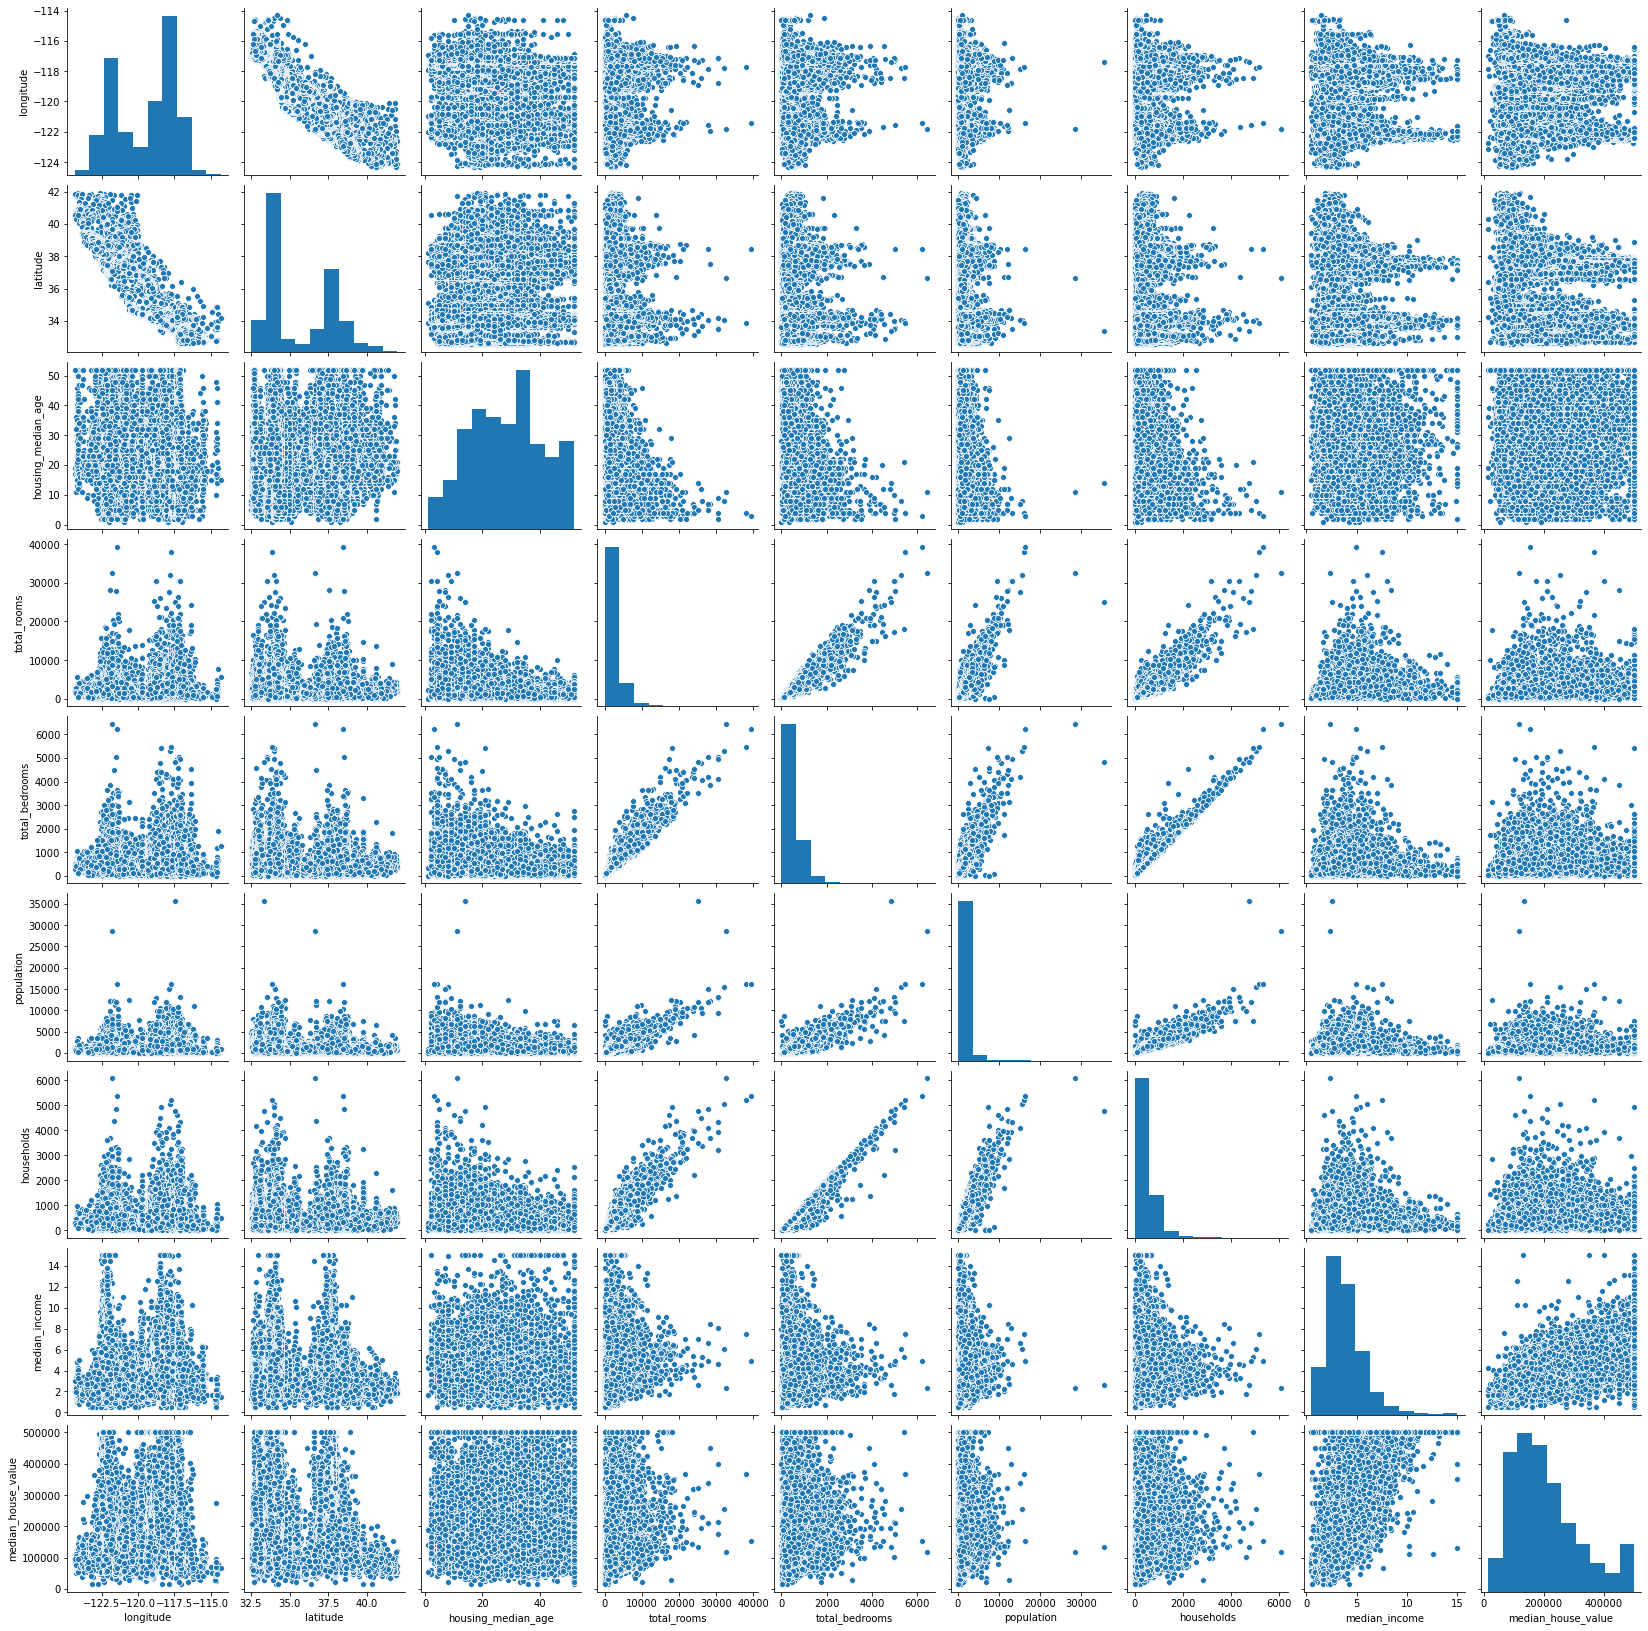

In [16]:
sns.pairplot(data)

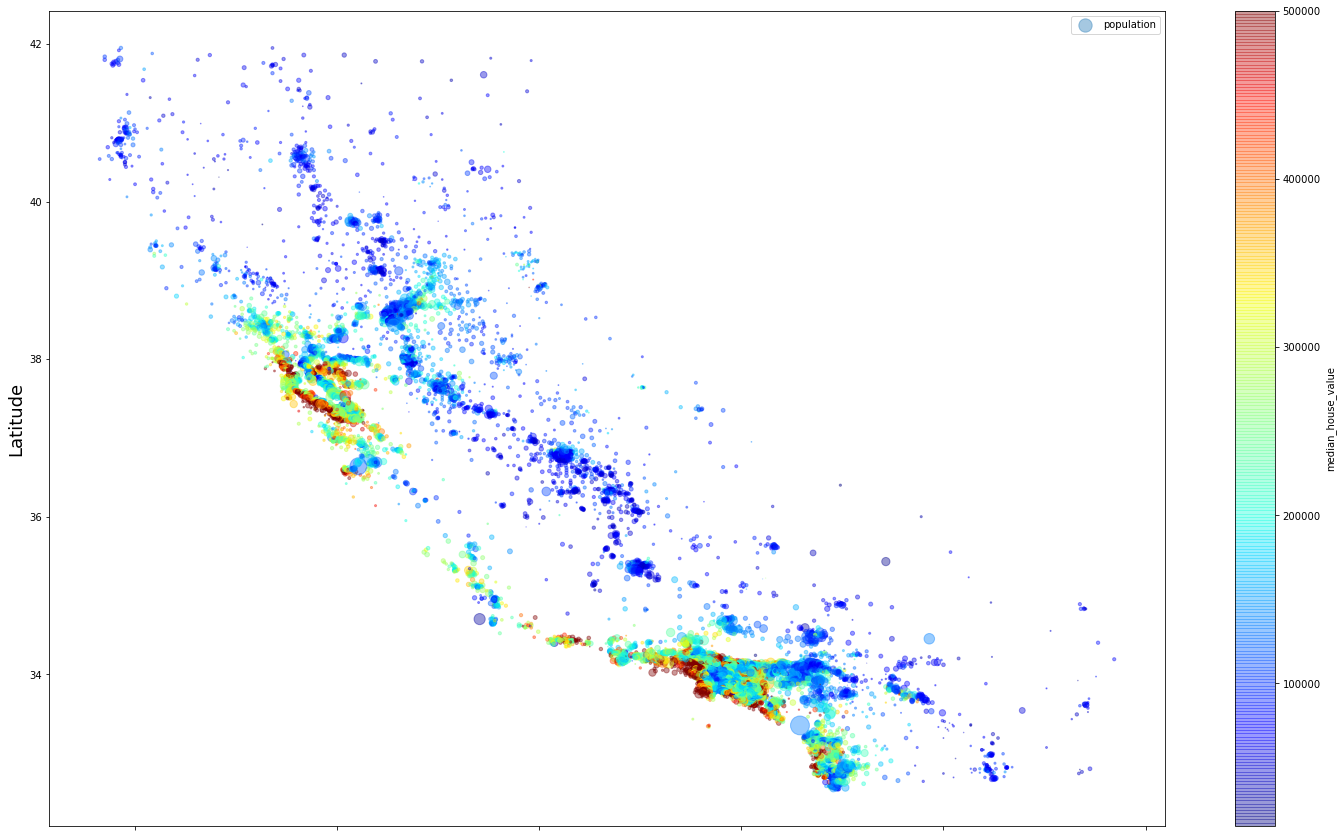

In [17]:
data.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,s=data['population']/100,label='population',
         figsize=(25,15),c = 'median_house_value',cmap=plt.get_cmap('jet'),colorbar=True)
plt.xlabel('Longitude',size=18)
plt.ylabel('Latitude',size=18)
plt.legend()
plt.show()

In [18]:
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [19]:
data['rooms_per_household'] = data['total_rooms']/data['households']
data['bedroom_per_rooms'] = data['total_bedrooms']/data['total_rooms']
data['population_per_household'] = data['population']/data['households']
data['family_income_wrt_households'] = data['median_income'] * data['households']
dummy_data = pd.get_dummies(data['ocean_proximity'],drop_first=True)
data = pd.concat([data,dummy_data],1)

In [20]:
data.corr()['median_house_value'].sort_values(ascending=False)

median_house_value              1.000000
median_income                   0.688075
family_income_wrt_households    0.352662
NEAR BAY                        0.160284
rooms_per_household             0.151948
NEAR OCEAN                      0.141862
total_rooms                     0.134153
housing_median_age              0.105623
households                      0.065843
total_bedrooms                  0.050968
ISLAND                          0.023416
population_per_household       -0.023737
population                     -0.024650
longitude                      -0.045967
latitude                       -0.144160
bedroom_per_rooms              -0.255261
INLAND                         -0.484859
Name: median_house_value, dtype: float64

##### From above we can see there are total 8 features which may be helpful in finding the predictions...

These are ['median_house_value','median_income','family_income_wrt_households','NEAR BAY','rooms_per_household','NEAR OCEAN','latitude','bedroom_per_rooms','INLAND','total_rooms','housing_median_age']

In [21]:
featured_data = data[ ['median_house_value','median_income','family_income_wrt_households','NEAR BAY','rooms_per_household','NEAR OCEAN','latitude','bedroom_per_rooms','INLAND','total_rooms','housing_median_age']]

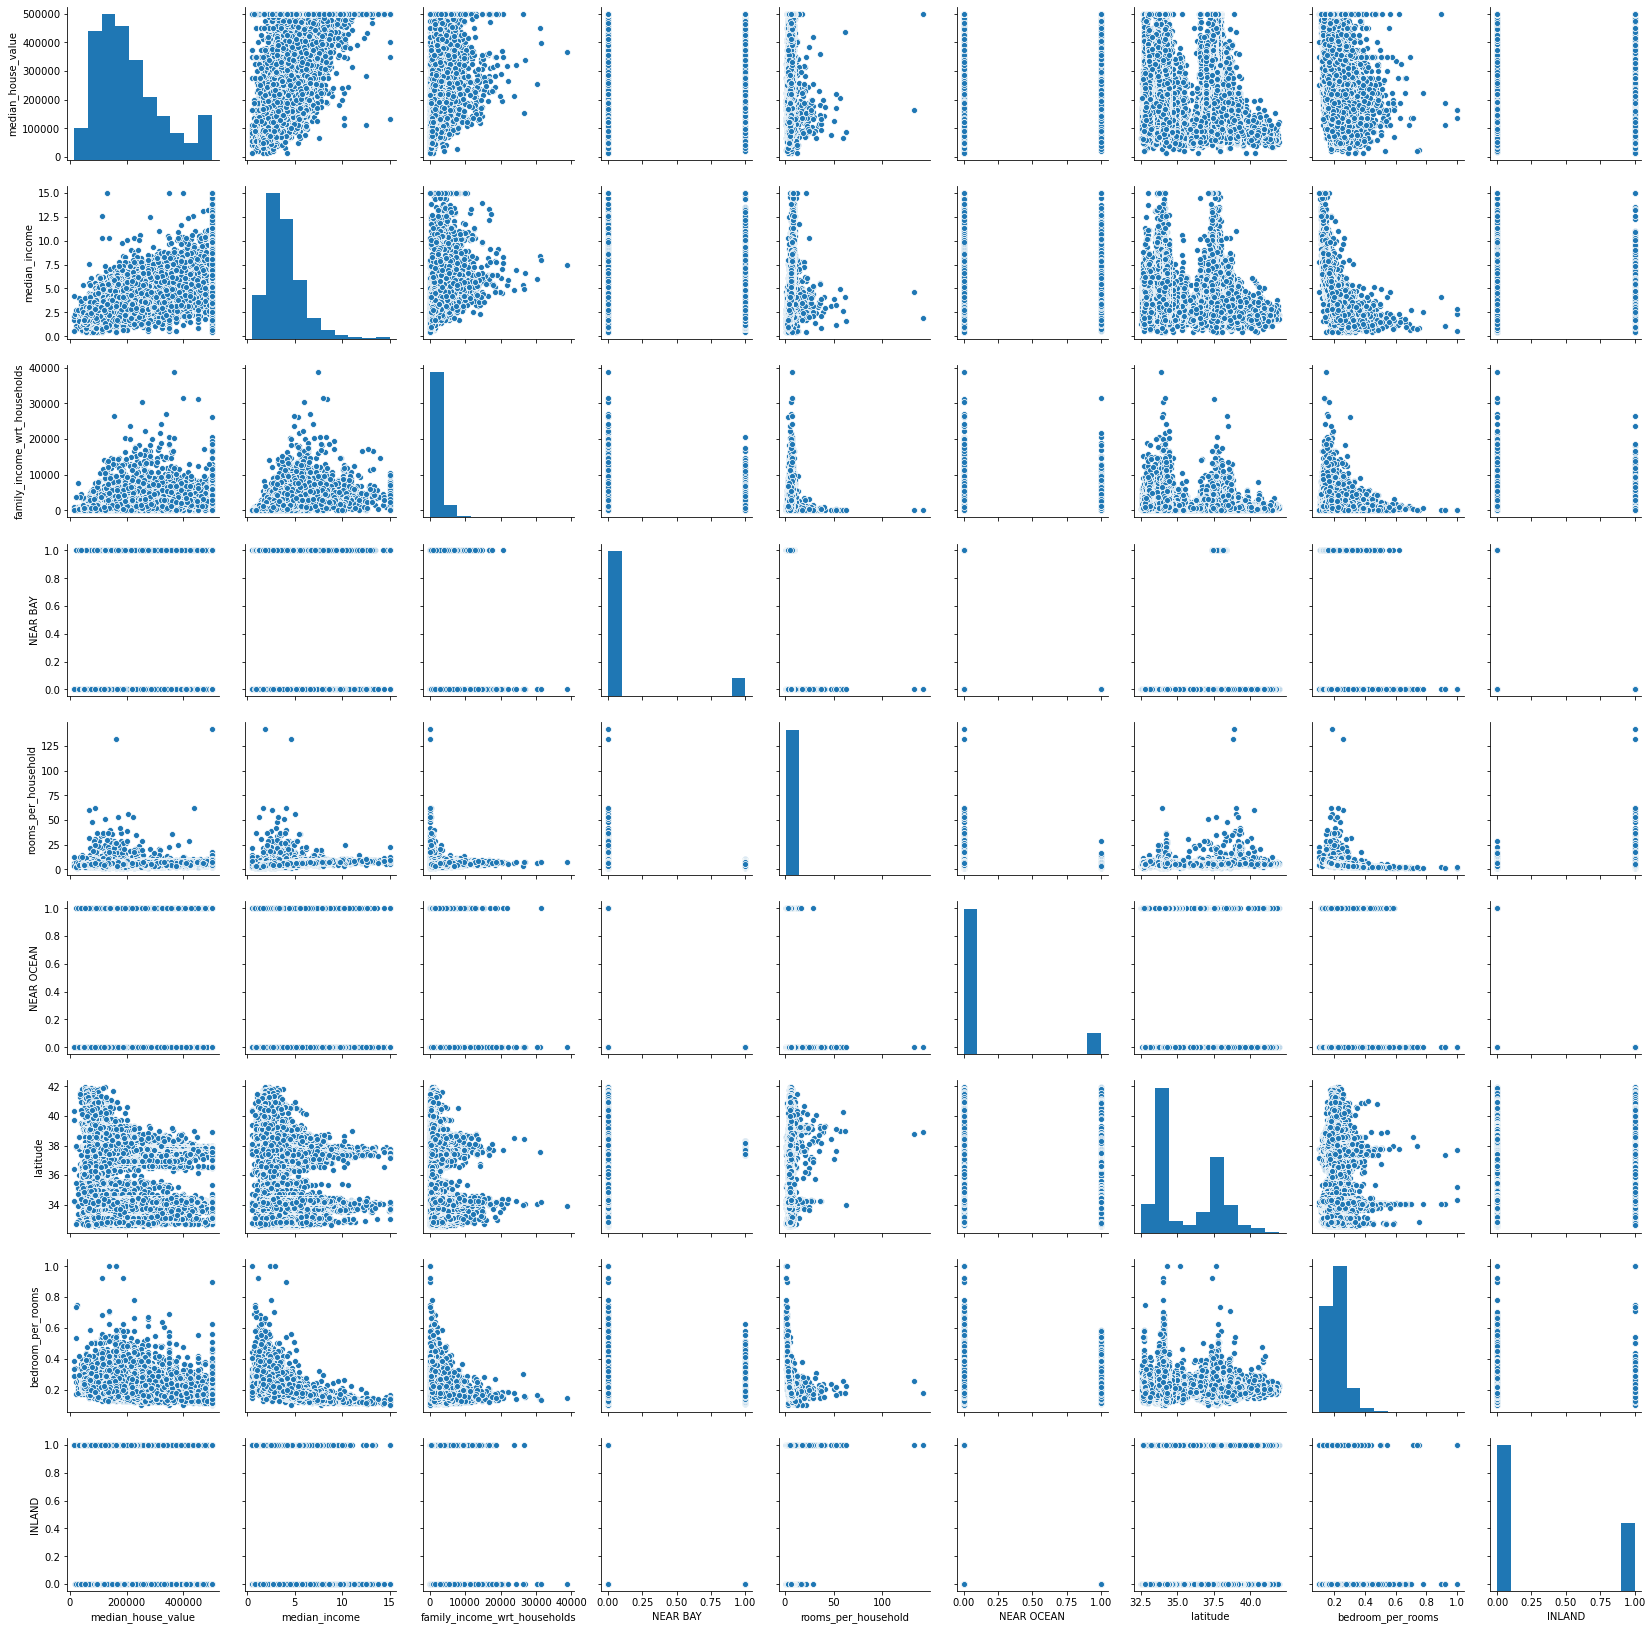

In [22]:
sns.pairplot(data[ ['median_house_value','median_income','family_income_wrt_households','NEAR BAY','rooms_per_household','NEAR OCEAN','latitude','bedroom_per_rooms','INLAND']])

In [23]:
data[featured_data['rooms_per_household'] > 100]
featured_data = featured_data.drop([1914,1979])
X = featured_data.drop(['median_house_value'],1)
y = featured_data['median_house_value']

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =95)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [44]:
print("Model coefficients : ",model.coef_)
print(' \n \n ')
print("Model Intercept : ",model.intercept_)

Model coefficients :  [ 76272.74029181  18036.24353852   3826.75898235   6426.76410095
   6281.62166501   1800.42919064  18931.99522949 -28897.38326538
  -7553.75230767  14622.9149622 ]
 
 
 
Model Intercept :  207450.14318595573


In [45]:
r2_score(y_test,model.predict(X_test))

0.6223312908754176

In [46]:
r2_score(y_train,model.predict(X_train))

0.614809718074207

In [47]:
X = sc.transform(X)
#data = data.drop([1914,1979])
data['predicted_median_value'] = model.predict(X)

In [48]:
#data['predicted_median_value'] = int(data['predicted_median_value'])
data[['median_house_value','predicted_median_value']]

median_house_value  predicted_median_value
0                452600.0           412110.614068
1                358500.0           446236.820940
2                352100.0           380475.517272
3                341300.0           325745.504324
4                342200.0           247144.647687
5                269700.0           269988.292709
6                299200.0           247353.380009
7                241400.0           233788.291112
8                226700.0           185877.943373
9                261100.0           254436.966346
10               281500.0           227592.546766
11               241800.0           239838.384623
12               213500.0           220137.855948
13               191300.0           224321.871294
14               159200.0           182388.908345
15               140000.0           192944.908819
16               152500.0           202365.226287
17               155500.0           190276.754009
18               158700.0           173509.674260
19               162900.0           200751.135582
20               147500.0           146832.689435
21               159800.0           157188.539933
22               113900.0           169711.418297
23                99700.0           182577.608387
24               132600.0           200520.733893
25               107500.0           186514.533585
26                93800.0           195021.091253
27               105500.0           172853.965810
28               108900.0           167303.602793
29               132000.0           166730.005138
30               122300.0           178869.076846
31               115200.0           180384.410930
32               110400.0           166617.059822
33               104900.0           150772.603477
34               109700.0           211774.128680
35                97200.0           158456.302926
36               104500.0           143052.568924
37               103900.0           165348.791383
38               191400.0           245986.825275
39               176000.0           232339.668715
40               155400.0           194369.878771
41               150000.0           183053.657031
42               118800.0           153859.136969
43               188800.0           260859.185322
44               184400.0           223011.378907
45               182300.0           220621.657283
46               142500.0           198698.202451
47               137500.0           186121.643461
48               187500.0           150222.775427
49               112500.0           210464.055284
50               171900.0           185674.634116
51                93800.0           155904.289587
52                97500.0           141160.728439
53               104200.0           165795.285085
54                87500.0           158027.234797
55                83100.0           166307.789151
56                87500.0           163358.421155
57                85300.0           134540.278961
58                80300.0           154643.102482
59                60000.0           155912.185639
60                75700.0           231545.561991
61                75000.0           345108.987950
62                86100.0           145853.099217
63                76100.0           145196.791396
64                73500.0           203950.187887
65                78400.0           142383.491672
66                84400.0           130768.362461
67                81300.0           217091.664739
68                85000.0           170505.008939
69               129200.0           130200.288378
70                82500.0           136543.917071
71                95200.0           147662.669391
72                75000.0           175303.763766
73                67500.0           139689.041205
74               137500.0           158080.934339
75               177500.0           139188.476067
76               102100.0           174918.386413
77               108300.0           100686.286214
78               112500.0            94112.776804
79     

In [49]:
r2_score(data['median_house_value'],data['predicted_median_value'])

0.6163744758804732